In [ ]:
import sys
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_excel
import datetime
import sklearn
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import seaborn as sns
from keras.models import load_model


In [ ]:
from pandas import read_csv

from matplotlib import pyplot
series = read_csv('data2.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


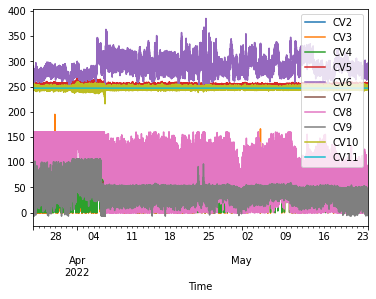

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('data2.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

In [ ]:
from matplotlib import pyplot
series.hist()
pyplot.show()

**DATA PRE-PROCESSING**

In [ ]:
# Making a list of missing value types
missing_values = ["n/a", "na", "Scan Timeout"]
df = pd.read_csv("data2.csv", na_values = missing_values)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Making a list of missing value types
missing_values = ["Scan Timeout"]
df = pd.read_csv("data2.csv", na_values = missing_values)
df

In [ ]:
new_df = df.fillna(method="ffill")
new_df

In [ ]:
# Using graph_objects
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure([go.Scatter(x=new_df['Time'], y=new_df['CV1'])])
fig.show()

In [ ]:
print(new_df.head())

In [ ]:
Dates = new_df["Time"]
new_df["Time"] = pd.to_datetime(new_df["Time"])
new_df.set_index(keys='Time', inplace=True)

In [ ]:
new_df

In [ ]:
print(new_df.dtypes)

In [ ]:
columns = new_df.columns
for x in columns:
  if new_df[x].dtypes != "float64":
     print("column ",x," type ",new_df[x].dtypes)

column  MV1  type  object
column  MV2  type  object
column  MV3  type  object
column  MV4  type  object
column  MV5  type  object
column  MV6  type  object
column  MV7  type  object
column  MV8  type  object
column  MV9  type  object
column  CV1  type  object
column  CV11  type  int64


In [ ]:
string_columns = []
columns = new_df.columns

for col in columns:
    if new_df.dtypes[col] == "object":

       new_df[col] = pd.to_numeric(new_df[col], errors='coerce').fillna(method="ffill")

In [ ]:
string_columns = []
columns = new_df.columns

for col in columns:
    if new_df.dtypes[col] == "object":
       column_values = list(new_df[col])


In [ ]:
print(new_df.dtypes)

MV1     float64
MV2     float64
MV3     float64
MV4     float64
MV5     float64
MV6     float64
MV7     float64
MV8     float64
MV9     float64
CV1     float64
CV2     float64
CV3     float64
CV4     float64
CV5     float64
CV6     float64
CV7     float64
CV8     float64
CV9     float64
CV10    float64
CV11      int64
dtype: object


In [ ]:
columns = new_df.columns
for x in columns:
  if new_df[x].dtypes != "float64":
     print("column ",x," type ",new_df[x].dtypes)

column  CV11  type  int64


In [ ]:
new_df = new_df.astype(float)

In [ ]:
columns = new_df.columns

In [ ]:
x_train = np.array(new_df[[columns[i] for i in range(1,10)]])
y_train = np.array(new_df["CV1"])
x_train

array([[ 329.6673889, 2084.907227 , 1736.950684 , ...,  160.8296509,
         136.2025452,  328.6860657],
       [ 329.6523132, 2084.907227 , 1736.880859 , ...,  160.8295746,
         136.202713 ,  328.68573  ],
       [ 329.6372681, 2084.907227 , 1736.810913 , ...,  160.8294983,
         136.2028961,  328.6854248],
       ...,
       [ 509.8677368,  507.5618896,  508.3757324, ...,  508.5113525,
         338.5554199,  502.6449585],
       [ 509.8677368,  507.5618896,  508.3757324, ...,  508.5113525,
         338.5554199,  502.6449585],
       [ 509.8677368,  507.5618896,  508.3757324, ...,  508.5113525,
         338.5554199,  502.6449585]])

In [ ]:
y_train = y_train.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
print("training data shape :",x_train.shape)
print("training variable CV1 shape ",y_train.shape)

training data shape : (87841, 9)
training variable CV1 shape  (87841, 1)


In [ ]:
full_sequence_xtrain = x_train
full_sequence_ytrain = y_train
#43921
x_test = x_train[43921:]
y_test = y_train[43921:]
x_train = x_train[0:43921]
y_train = y_train[0:43921]

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (43921, 9)
y_train shape :  (43921, 1)
x_test shape :  (43920, 9)
y_test shape :  (43920, 1)


**Modeling lstm**

In [ ]:
# define the Autoencoder model
from keras.models import load_model
import datetime
import sklearn
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
#model.add(LSTM(64, input_shape=(x_train.shape[1], 1)))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error', optimizer='adam',metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.add(LSTM(128, activation='relu', input_shape=(x_train.shape[1], 1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(keras.layers.Dropout(0.20, noise_shape=None, seed=None))

model.add(Dense(y_train.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 9, 128)            66560     
                                                                 
 lstm_6 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 87,201
Trainable params: 87,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=1, validation_split=0.1, verbose=2)
#history = model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=2)


Epoch 1/10
39528/39528 - 117s - loss: 5.3651e-04 - val_loss: 9.0306e-05 - 117s/epoch - 3ms/step
Epoch 2/10
39528/39528 - 116s - loss: 4.5477e-05 - val_loss: 1.3560e-04 - 116s/epoch - 3ms/step
Epoch 3/10
39528/39528 - 116s - loss: 3.7362e-05 - val_loss: 1.1110e-04 - 116s/epoch - 3ms/step
Epoch 4/10
39528/39528 - 116s - loss: 3.5168e-05 - val_loss: 1.0032e-04 - 116s/epoch - 3ms/step
Epoch 5/10
39528/39528 - 117s - loss: 3.3374e-05 - val_loss: 2.7016e-05 - 117s/epoch - 3ms/step
Epoch 6/10
39528/39528 - 116s - loss: 3.2894e-05 - val_loss: 4.0340e-05 - 116s/epoch - 3ms/step
Epoch 7/10
39528/39528 - 115s - loss: 3.2256e-05 - val_loss: 6.5985e-05 - 115s/epoch - 3ms/step
Epoch 8/10
39528/39528 - 116s - loss: 3.1271e-05 - val_loss: 2.6597e-05 - 116s/epoch - 3ms/step
Epoch 9/10
39528/39528 - 116s - loss: 3.1420e-05 - val_loss: 3.1310e-05 - 116s/epoch - 3ms/step
Epoch 10/10
39528/39528 - 116s - loss: 3.0587e-05 - val_loss: 2.1930e-05 - 116s/epoch - 3ms/step


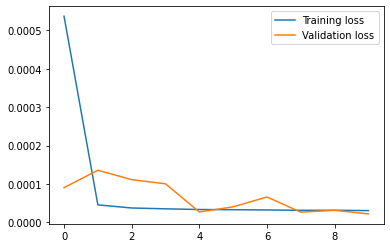

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

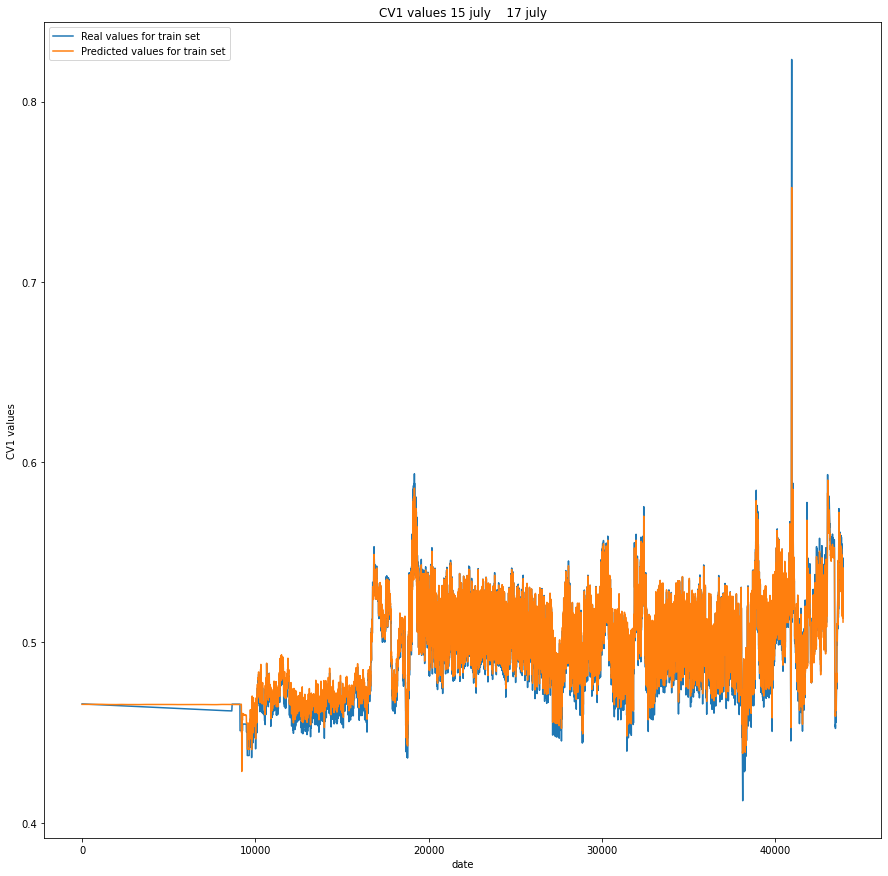

In [ ]:
predictions = model.predict(x_train)
plt.figure(figsize=(15,15))
plt.plot(iter[0:43921], y_train,label='Real values for train set')
plt.plot(iter[0:43921], predictions,label='Predicted values for train set')
plt.xlabel("date")
plt.ylabel("CV1 values")
plt.title("CV1 values 15 july "+"   17 july")
plt.legend()